## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
# VGG19 is a variant of VGG model which in short consists of 19 layers 
# (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers 
# and 1 SoftMax layer).

import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)
# En la parte de las features se tienen las capas convolucionales, de a
# activación y de pooling. En la parte del classifier se tiene la capa
# completamente conectada (linear) y de activación.

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [4]:
# En Neural Style Transfer no se quiere el classifier, porque no se va
# a extraer el contenido y el style freature del clasificador, sino más
# bien se extraen de las capas convolucionales.
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
# Se usa el model pre-entrenado, por lo que no se actualizan ni los
# weights ni biases del modelo. Por esto no se calculan tamposo los
# gradientes (porque no actualizan los weights).

# Se congela el modelo, no se calculan gradientes
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [6]:
from torch.cuda import is_available
# Se usa CUDA para mover las variables y modelos a la GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [7]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [8]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert('RGB')

  # Resize:
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  # Transforms
  img_transforms = T.Compose([
                              T.Resize(size),
                              T.ToTensor(), #(h, w, c) -> (c, h, w)
                              # Todos los modelos pre-entrenados esperan imágenes
                              # normalizadas de la misma manera
                              T.Normalize(mean=[0.485, 0.456, 0.406], 
                                          std=[0.229, 0.224, 0.225])  # Hardcoded
  ])

  # Se aplican las transforms a la imagen
  image = img_transforms(image)

  # Unsqueeze la dimensión 0 porque se añade el batch size,
  # porque el input del modelo tiene la forma (bs, c, h, w)
  image = image.unsqueeze(0)

  return image

In [9]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style12.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content shape ", content_p.shape)
print("Style shape ", style_p.shape)

Content shape  torch.Size([1, 3, 259, 345])
Style shape  torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Se hace la operación contraria al preprocess, para poder plottear la imagen
def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()           # Convierte de tensor format a numpy format
  image = image.squeeze(0)        # Se quita el batch size
  image = image.transpose(1,2,0)  # (c, h, w) -> (h, w, c)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]) # Se denormaliza con el mean y std
  image = image.clip(0,1)         # Imagen entre 0 y 1

  return image

In [11]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocess content shape ", content_d.shape)
print("Deprocess style shape ", style_d.shape)

Deprocess content shape  (259, 345, 3)
Deprocess style shape  (625, 500, 3)


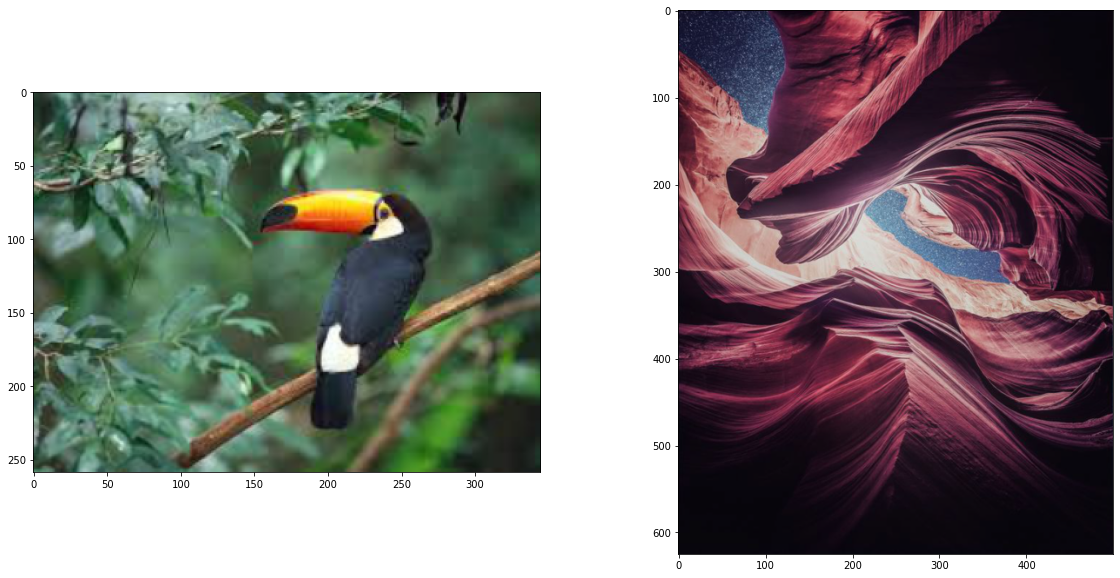

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [13]:
# Se extraen style y content features de las capas del modelo vgg19

def get_features(image, model):
  layers = {
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2',    # Content feature
      '28': 'conv5_1'
  }

  x = image

  # Diccionario que va a contener los outputs de cada capa de interés
  Features = {}

  for name, layer in model._modules.items():
    x = layer(x)          # Itera sobre cada capa del modelo vgg19 y le 
                          # pasa la salida de la capa anterior a la entrada 
                          # de la capa siguiente.
    if name in layers:
      Features[layers[name]] = x

  return Features

In [14]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

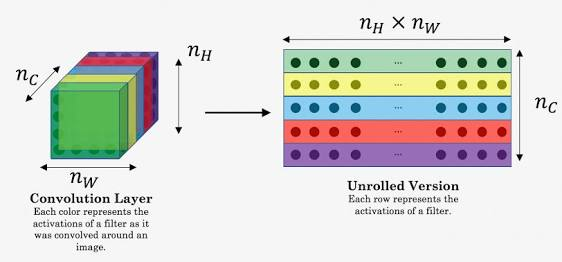

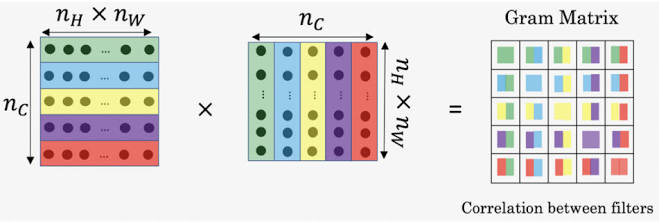

In [15]:
# Se crea la style gram matrix: esta matriz es la correlación entre los filtros.
def gram_matrix(tensor):
  # Si se le pasa un tensor entonces primero se tiene que unroll (c, h, w) -> (c, hxw)
  b, c, h, w = tensor.size()
  tensor = tensor.view(c,h*w)

  # Finalmente se multiplica por su transpuesta y se obtiene la gram matrix
  gram = torch.mm(tensor, tensor.t())

  return gram

In [16]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [17]:
# Fórmula del paper para el content loss:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [18]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [19]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0

  for layer in style_weights:
    # Se calculan las features y la gram matrix para el target
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)

    # Se agarra la style gram para la layer en cuestión
    style_gram = style_grams[layer]

    b, c, h, w = target_f.shape

    # Fórmula del paper para style loss, MSE:
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    
    # Promedio
    loss += layer_loss/(c*h*w)

  return loss

In [20]:
# La imagen que se quiere generar, se puede inicializar con random noise
# o con la content image. Sí se necesitan los gradients esta vez.
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)

print("Content Loss : ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Style Loss : ", style_loss(style_weights, target_f, style_grams))

Content Loss :  tensor(0., grad_fn=<MeanBackward0>)
Style Loss :  tensor(1790.8411, grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [21]:
# Se quieren minimizar el content y style loss
from torch import optim

# Se quiere hacer update de los pixels del target, por eso [target]
# Normalmente se le pasan los weights y biases, pero aquí no es el caso
optimizer = optim.Adam([target], lr=0.003)

# Hiperparámetros
alpha = 1   # Content reconstruction weight
beta = 1e5  

epochs = 3000
show_every = 500

In [22]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [23]:
# Training loop
results = []

for i in range(epochs):
  # Target features
  target_f = get_features(target, vgg)

  # Losses
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  # Se ponen en cero los gradientes + se calculan los gradientes
  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()    # Update the pixel values

  if i % show_every == 0:
    print("Total Loss at Epoch {} : {}". format(i, t_loss))
    results.append(deprocess(target.detach()))

Total Loss at Epoch 0 : 179084112.0
Total Loss at Epoch 500 : 27117450.0
Total Loss at Epoch 1000 : 15138405.0
Total Loss at Epoch 1500 : 11678421.0
Total Loss at Epoch 2000 : 9615311.0
Total Loss at Epoch 2500 : 8205463.0


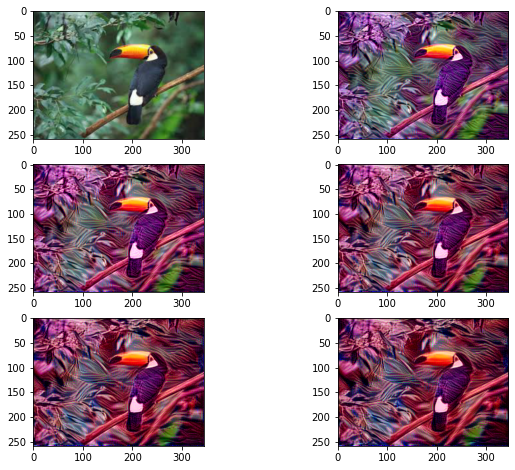

In [24]:
plt.figure(figsize = (10,8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])

plt.show()

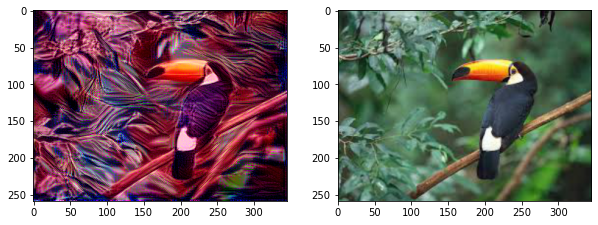

In [25]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)